<a href="https://colab.research.google.com/github/ShauryaSingh19/Inflow-Performance-Relationship/blob/main/IPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inflow Performance Relationship (IPR)

#Darcy's Method

In [ ]:
import psapy.Vogel as IPR
import psapy.FluidProps as FluidProps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import numpy as np
sns.set(color_codes=True)

Input Data

In [ ]:
Pressure=4000.0
Thickness=75.0
k= 50.0
visc = 0.5
GasGrav=0.65
API= 28.0
GOR= 375.0
Temp=150.0
rw=0.328
re=1053.0
s=-1.5
OilFVF = 1.2

In [ ]:
Psat = FluidProps.Pbub(Temp,75,100,GasGrav, API, GOR)
Psat

2370.202357201929

In [ ]:
# def Darcy_IPR(k,h,visc, re,rw, s, P, OilFVF, nPoints):
print(IPR.Darcy_IPR.__doc__)
nPoints= 10

IPR_darcy= IPR.Darcy_IPR(k,Thickness,visc, re,rw, s, Pressure, OilFVF, nPoints)

Function to calculate IPR using Darcy's Equation.  It returns a list with a pair of Pressure and rates


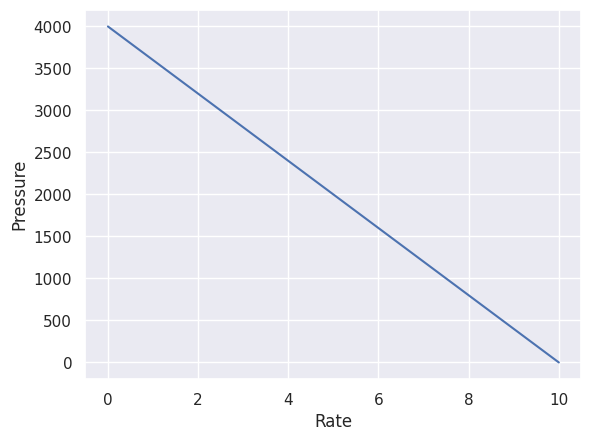

In [ ]:
scatter =sns.lineplot(IPR_darcy[1])
plt.xlabel('Rate')
plt.ylabel('Pressure');

#Vogel's Method

In [ ]:
#def VogelIPR(P, Pb, Pwf, Qo, nPoints):

Qo = 500
Pb =2370
P = 2370
Pwf = 2000
nPoints =10

IPR_vogel= IPR.VogelIPR(P, Pb, Pwf, Qo, nPoints)

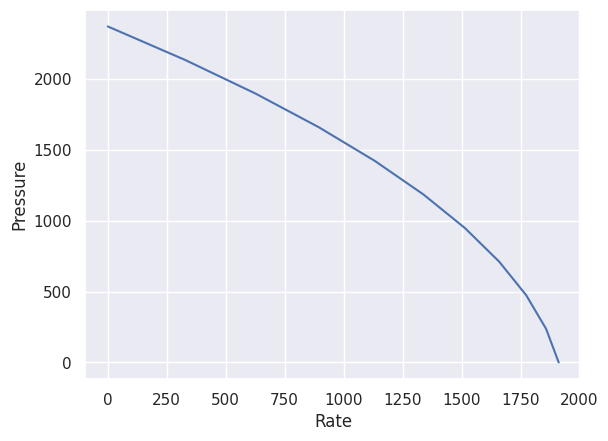

In [ ]:
scatter =sns.lineplot(x=IPR_vogel[0], y=IPR_vogel[1], markers = True)
plt.ylabel("Pressure");
plt.xlabel("Rate");

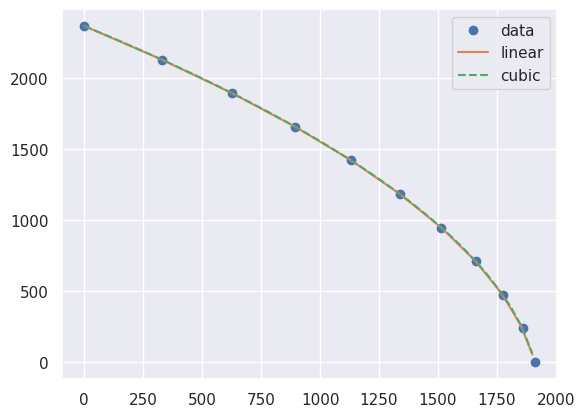

In [ ]:
x=IPR_vogel[0]
y=IPR_vogel[1]
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0.1, 1900, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()